In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

In [2]:
#import datasets
data = pd.read_csv("spam.csv",encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data preprocessing

In [4]:
#drop unwanted columns and name change
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [5]:
# convert label to a numerical variable
data['label'] = data.label.map({'ham':0, 'spam':1})

In [6]:
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#count observations in each label
data.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

# From above, we can say datasets are imbalance hence we can perform certain sampling technique to make it balance datasets

# I'm not doing it here to make it more simpler

# Feature creation i.e bags of words model from sms texts

In [8]:
#text transformation (stopwords,lowering,stemming) and creating bag of words model using CountVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [9]:
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [10]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 0].values

In [11]:
#showing first and last 20 features names
print(cv.get_feature_names()[0:20])
print(cv.get_feature_names()[-20:])

['aa', 'aah', 'aaniy', 'aaooooright', 'aathi', 'ab', 'abbey', 'abdomen', 'abeg', 'abel', 'aberdeen', 'abi', 'abil', 'abiola', 'abj', 'abl', 'abnorm', 'abouta', 'abroad', 'absenc']
['yunni', 'yuo', 'yuou', 'yup', 'yupz', 'zac', 'zaher', 'zealand', 'zebra', 'zed', 'zero', 'zf', 'zhong', 'zindgi', 'zoe', 'zogtoriu', 'zoom', 'zouk', 'zs', 'zyada']


In [12]:
print(X.shape,y.shape)

(5572, 6221) (5572,)


# Splitting datasets into training and test data

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [14]:
print(X_train.shape,X_test.shape)

(4457, 6221) (1115, 6221)


# Data visualisation just for fun 

In [15]:
#Visualisations
from wordcloud import WordCloud

In [16]:
ham_words = ''
spam_words = ''
spam = data[data.label == 1]
ham = data[data.label ==0]

In [17]:
for val in spam.text:
    text = re.sub('[^a-zA-Z]', ' ', val)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    for words in text:
        spam_words = spam_words + words + ' '
    
for val in ham.text:
    text = re.sub('[^a-zA-Z]', ' ', val)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    for words in text:
          ham_words = ham_words + words + ' '
      

In [18]:
# Generate a word cloud image
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

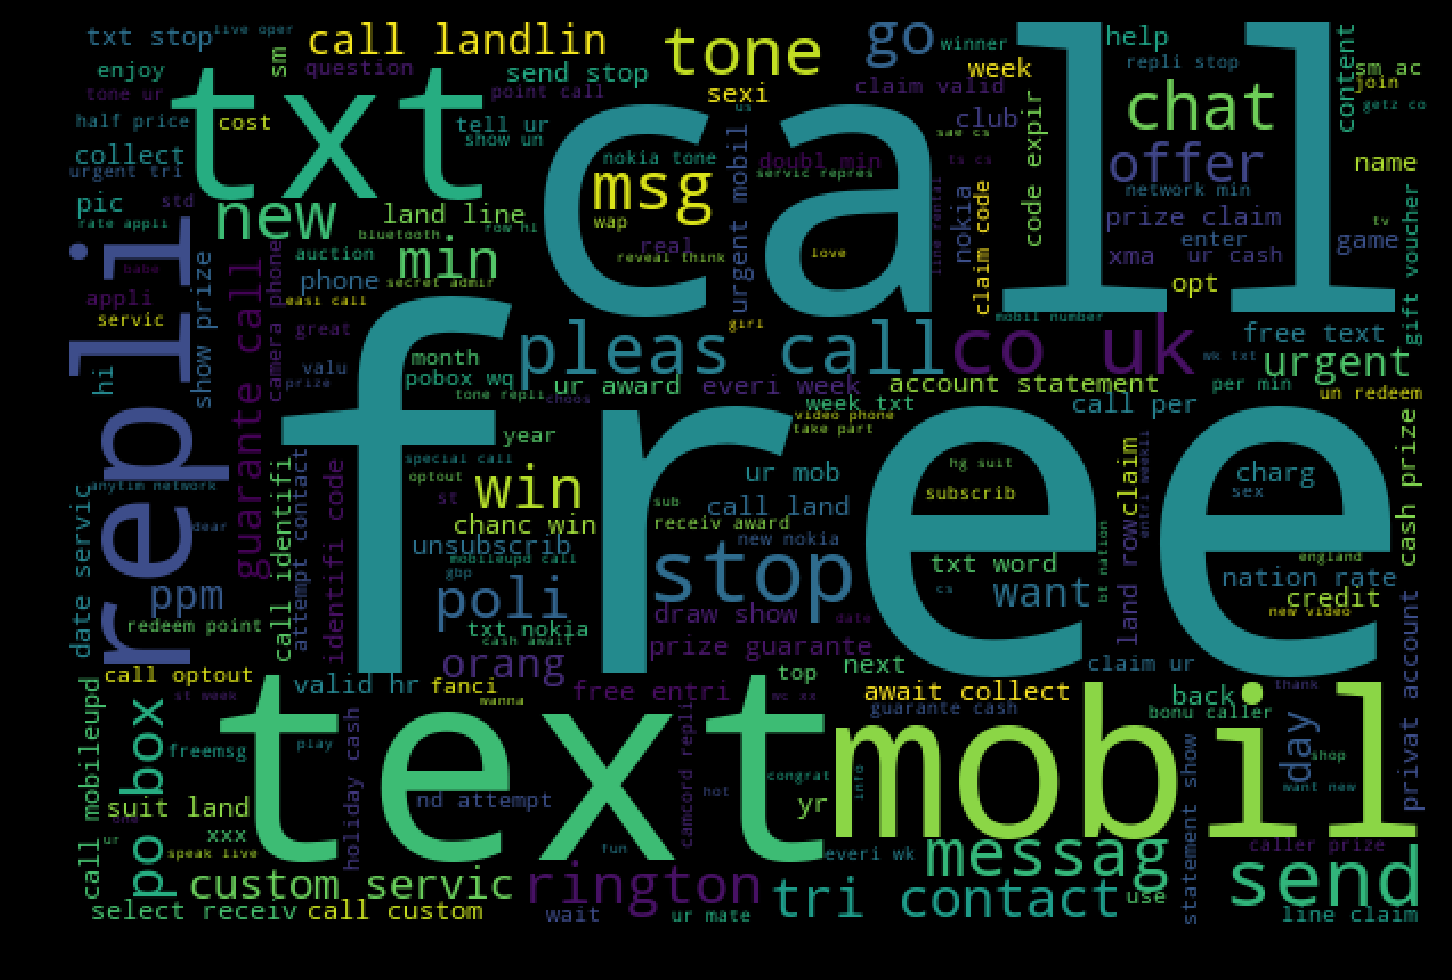

In [19]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

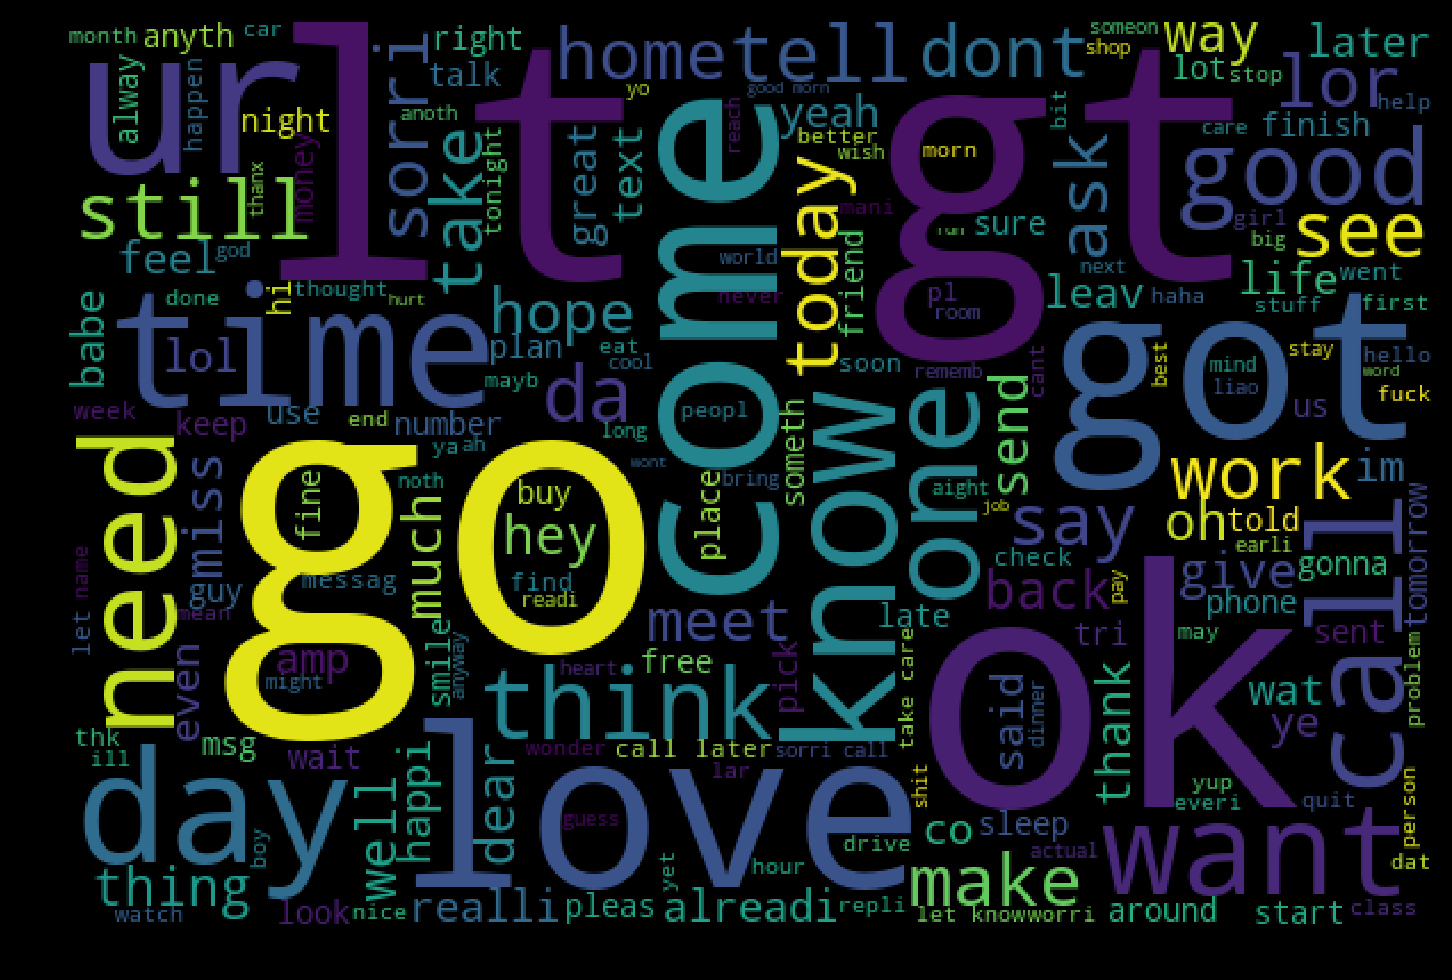

In [20]:
#Ham word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Machine learning models

In [21]:
# Fitting Naive Bayes to the Training set (Gaussian NB)
prediction = dict()
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
# Predicting the Test set results
prediction["GaussianNB"] = classifier.predict(X_test)
accuracy_score(y_test,prediction["GaussianNB"])

0.8645739910313901

In [23]:
# Fitting Naive Bayes to the Training set (Multinomial NB)
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
# Predicting the Test set results
prediction["MultinomialNB"] = classifier.predict(X_test)
accuracy_score(y_test,prediction["MultinomialNB"])

0.979372197309417

In [25]:
# Fitting Naive Bayes to the Training set (Multinomial NB)
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [26]:
# Predicting the Test set results
prediction["BernouliiNB"] = classifier.predict(X_test)
accuracy_score(y_test,prediction["BernouliiNB"])

0.967713004484305

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
# Predicting the Test set results
prediction["Logistic"] = classifier.predict(X_test)
accuracy_score(y_test,prediction["Logistic"])

0.967713004484305

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
# Predicting the Test set results
prediction["KNN"] = classifier.predict(X_test)
accuracy_score(y_test,prediction["KNN"])

0.967713004484305

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
# Predicting the Test set results
prediction["RandomForrest"] = classifier.predict(X_test)
accuracy_score(y_test,prediction["RandomForrest"])

0.967713004484305

# Model evaluation

In [33]:
conf_mat = confusion_matrix(y_test, prediction['MultinomialNB'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

Text(0.5,15,'Predicted label')

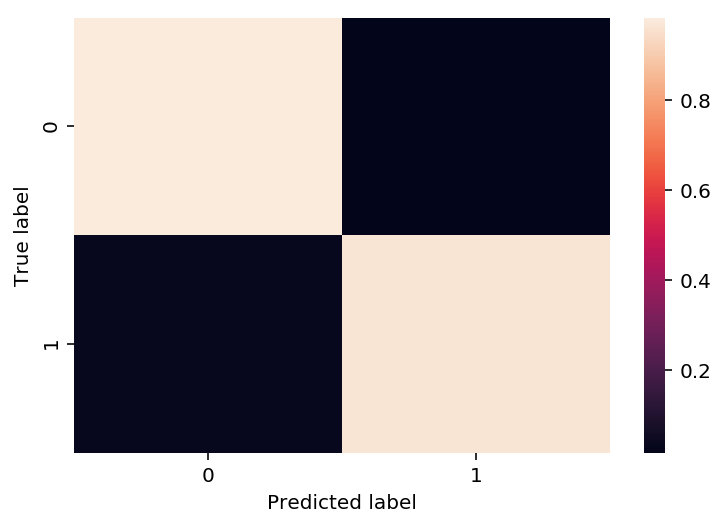

In [34]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [35]:
print(conf_mat)

[[932  17]
 [  6 160]]


# By seeing the above confusion matrix, it is clear that 17 Ham are mis classified as Spam, and 6 Spam are misclassified as Ham. 

In [36]:
#model evaluation
print(classification_report(y_test, prediction['MultinomialNB'], target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.99      0.98      0.99       949
        Spam       0.90      0.96      0.93       166

   micro avg       0.98      0.98      0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# Generally, Naive Bayes works well on text data. Multinomail Naive bayes is best suited for classification with discrete features.